### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [505]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [423]:
df = pd.read_csv('data/telco_churn_data.csv')

In [424]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [426]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [427]:
#identify the non numeric columns and their unique values and converting the colums with Yes/No to 1 and 0
# created a copy of the dataset , so that we can map the dropped colums later to see the cluster behavior on those 
df_d = df.copy()
#non numeric columns
object_cols = df_d.select_dtypes('object').columns.tolist()
# print(object_cols)
for k in range(1,len(object_cols)):
  #  print(object_cols[k],df_d[object_cols[k]].unique())
    if (any(df_d[object_cols[k]].unique() == 'Yes') or any(df_d[object_cols[k]].unique() == 'No')):
        #print(1)
        df_d[object_cols[k]] = df_d[object_cols[k]].map(dict(Yes=1, No=0))
        
df_d.head(4)

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,0,0,1,None,0,0.00,0,1,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0


In [428]:
object_cols = df_d.select_dtypes('object').columns.tolist()
print(object_cols)

['Customer ID', 'Offer', 'Internet Type', 'Contract', 'Payment Method', 'Gender', 'City', 'Churn Category', 'Churn Reason']


#### Dropping -  Population, Customer ID, Payment Method,  CLTV  - as some of these values are either unique or similar on the dataset
#### Dropping - city, Zip Code, Latutude, Longitude - as these represent similar property (location)
#### Dropping Churn Category, Churn Reason , Customer Satidfaction as these have maximum number of Nan and also these can be factored in by using the churn value
#### Dropping Dependents as its reflected in Number of Dependents, similarly dropping Under 30 and Senior Citizen as its reflected in Age

In [429]:
df_d.drop(columns = ['Customer ID','Latitude','Longitude','Churn Category','Churn Reason','CLTV','Payment Method','City','Zip Code','Under 30','Offer','Contract','Internet Type','Population','Senior Citizen','Dependents','Customer Satisfaction'], inplace=True)

In [430]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection Plan             7043 non-null   int64  
 11  Premium Tech Support               7043 non-null   int64

In [431]:
# remaining non integrer columns
object_cols = df_d.select_dtypes('object').columns.tolist()
print(object_cols)

['Gender']


In [432]:
# applying one hot encoding 
df_encoded = pd.get_dummies(df_d)
df_encoded.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Total Extra Data Charges,Total Long Distance Charges,Age,Married,Number of Dependents,Churn Value,Total Customer Svc Requests,Product/Service Issues Reported,Gender_Female,Gender_Male
0,0,0,1,0,0.00,0,1,9,0,0,...,0.0,0.00,78,0,0,1,5,0,0,1
1,1,1,8,1,48.85,1,1,19,0,1,...,120.0,390.80,74,1,1,1,5,0,1,0
2,0,0,18,1,11.33,1,1,57,0,0,...,0.0,203.94,71,0,3,1,1,0,0,1
3,1,1,25,1,19.76,0,1,13,0,1,...,327.0,494.00,78,1,1,1,1,1,1,0
4,1,1,37,1,6.33,1,1,15,0,0,...,430.0,234.21,80,1,1,1,1,0,1,0


In [433]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection Plan             7043 non-null   int64  
 11  Premium Tech Support               7043 non-null   int64

In [434]:
#normalizing the data
df_norm = (df_encoded - df_encoded.mean())/ df_encoded.std()

In [435]:
from sklearn.decomposition import PCA

In [436]:
#Starting with 15 principal components
pca = PCA(random_state = 42)
pca.fit(df_norm)

PCA(random_state=42)

In [437]:
pca.explained_variance_ratio_

array([2.05834246e-01, 1.13172939e-01, 7.23830028e-02, 6.66682129e-02,
       6.31552188e-02, 5.23474915e-02, 4.31306353e-02, 3.94222554e-02,
       3.38366317e-02, 3.22224295e-02, 2.72551544e-02, 2.65664709e-02,
       2.56269353e-02, 2.33235531e-02, 2.28812854e-02, 2.20498660e-02,
       2.11663953e-02, 1.93857806e-02, 1.83099448e-02, 1.55943339e-02,
       1.45706737e-02, 1.09156474e-02, 8.64964079e-03, 8.36833274e-03,
       4.05837503e-03, 3.63775823e-03, 2.41191647e-03, 1.59846536e-03,
       1.45640801e-03, 2.37991615e-33])

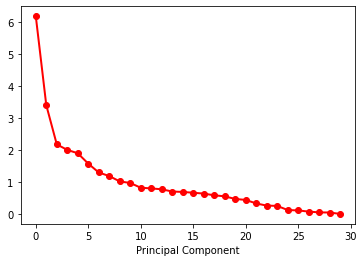

In [438]:
# Scree Plot
plt.plot(pca.explained_variance_,'ro-',linewidth=2)
plt.xlabel('Principal Component')
plt.show()

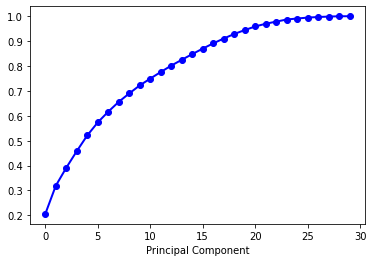

In [439]:
# variance -
plt.plot(np.cumsum(pca.explained_variance_ratio_),'bo-',linewidth=2)
plt.xlabel('Principal Component')
plt.show()

In [440]:
#### Selecting Pricipal component = 5 as it convers 50% of the variance
pca = PCA(n_components=5,random_state=42)
pca.fit(df_norm)
pca.explained_variance_ratio_

array([0.20583425, 0.11317292, 0.07238163, 0.06666664, 0.06314459])

In [441]:
np_pca = pca.fit_transform(df_norm)
df_pca = pd.DataFrame(np_pca)
df_pca.shape

(7043, 5)

In [442]:
from sklearn.cluster import KMeans

In [443]:
#starting with 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 123).fit(df_pca)

In [444]:
kmeans.labels_

array([2, 2, 2, ..., 0, 3, 0], dtype=int32)

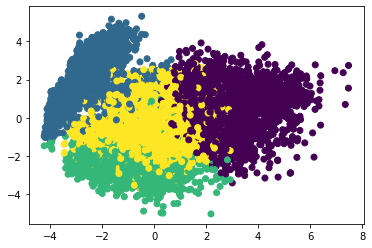

In [445]:
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1], c = kmeans.labels_)

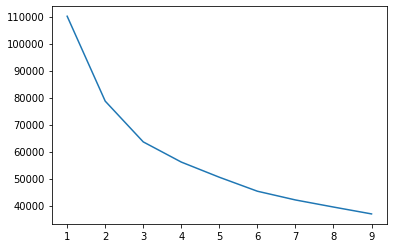

In [446]:
sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters = k, random_state = 123, max_iter = 1000).fit(df_pca)
  sse[k] = kmeans.inertia_
# plotting inertia
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))

#### We can see from the plot above having cluster size 3 is optimal

In [447]:
kmeans = KMeans(n_clusters = 3, random_state = 123).fit(df_pca)

In [448]:
# Adding the clusters to the original dataset
df["Cluster"] = kmeans.labels_

### Analyzing the results

#### 1) For Phone Service, Male in agegroup  < 30 tend to sign in long term contract and prefer device protection and unlimited Data

In [527]:
df.groupby("Cluster")['Contract','Phone Service','Device Protection Plan','Unlimited Data','Married','Gender','Age'].agg(pd.Series.mode)


,Contract,Phone Service,Device Protection Plan,Unlimited Data,Married,Gender,Age
Cluster,,,,,,,
0,Month-to-Month,Yes,No,No,No,Female,47
1,Month-to-Month,Yes,No,No,Yes,Male,42
2,Two Year,Yes,Yes,Yes,Yes,Male,"[21, 25]"


#### 2) For Internet Service, Male in agegroup  < 30  and Females tend to sign up for Internet Service's , also in this category only Male tend to use the Streaming services

In [517]:
df.groupby("Cluster")['Internet Service','Streaming TV','Streaming Music','Streaming Movies','Gender','Age'].agg(pd.Series.mode)


,Internet Service,Streaming TV,Streaming Music,Streaming Movies,Gender,Age
Cluster,,,,,,
0,Yes,No,No,No,Female,47
1,No,No,No,No,Male,42
2,Yes,Yes,Yes,Yes,Male,"[21, 25]"


#### 3) Paperless Billing is considered by customers who use Bank Withdrawal as Payment Method

In [520]:
df.groupby("Cluster")['Paperless Billing','Payment Method'].agg(pd.Series.mode)


,Paperless Billing,Payment Method
Cluster,,
0,Yes,Bank Withdrawal
1,No,Credit Card
2,Yes,Bank Withdrawal


#### 4) Customers in Cluster 0 are having a churn value 1 and tend not to refer a Friend to any of the services.

In [526]:
df.groupby("Cluster")['Referred a Friend','Tenure in Months','Churn Value'].agg(pd.Series.mode)


,Referred a Friend,Tenure in Months,Churn Value
Cluster,,,
0,No,1,1
1,Yes,1,0
2,Yes,72,0
